In [1]:
from os import listdir
from keras.models import load_model
from keras.models import Sequential
from keras.optimizers import Adam
import tensorflow as tf
from keras.preprocessing.image import img_to_array, load_img
from numpy import expand_dims, zeros, ones, vstack, asarray, savez_compressed, load 
from keras.layers import Dense, Reshape, Flatten, Conv2D, Conv2DTranspose, LeakyReLU, Dropout
from numpy.random import randn
from matplotlib import pyplot
import numpy as np

In [2]:
def generate_latent_representation(latent_dim, image_shape=(256,256,3)):
    model = Sequential()
    model.add(Conv2D(64, 3, padding='same', input_shape=image_shape))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Conv2D(128, 3, strides=(2,2), padding='same'))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Conv2D(256, 3, strides=(2,2), padding='same'))
    model.add(LeakyReLU(alpha=0.2)) 
    model.add(Flatten())
    model.add(Dense(latent_dim))
    opt = Adam(lr=0.0002, beta_1=0.5)
    model.compile(loss='binary_crossentropy', optimizer=opt)
    return model

def save_plot(examples, n):
    print(np.shape(examples))
    # plot images
    for i in range(1):
        # define subplot
        pyplot.subplot(n, n, 1 + i)
        # turn off axis
        pyplot.axis('off')
        # plot raw pixel data
        pyplot.imshow(examples[i])
    pyplot.show()

In [3]:
latent_dim = 1000
model = load_model('model/1000/generator_model2_2000.h5')
MLP = generate_latent_representation(latent_dim)

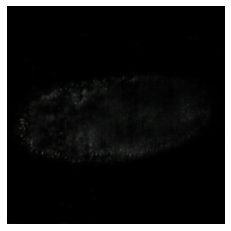

In [4]:
path = 'data/Evaluation/impo/'
size = 96

for filename in listdir(path):
    j = filename.find(".")
    name = filename[:j]
    image = load_img(path+filename, target_size=(256,256))
    image = img_to_array(image)
    image = image / 255.0
    image = expand_dims(image, 0)
    X = MLP.predict(image)
    X = model.predict(X)
    pyplot.axis('off')
    pyplot.imshow(X[0])

    filename1 = 'data/Evaluation/Fake/%01d.jpg' % int(name)
    pyplot.savefig(filename1, dpi=size, bbox_inches='tight',pad_inches = 0)
    tf.keras.backend.clear_session()